# Data Exploration: Heston Simulation Validation

This notebook validates the Heston simulation with Inverse Gaussian scheme.

In [1]:
import sys
sys.path.append('..')

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.utils.config import load_config
from src.data.heston import HestonSimulator

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load Configuration

In [2]:
config = load_config('../config.yaml')
heston_params = config['data']['heston']
print("Heston parameters:")
for key, value in heston_params.items():
    print(f"  {key}: {value}")

Heston parameters:
  S_0: 100.0
  K: 100.0
  r: 0.02
  mu: 0.05
  v_0: 0.0175
  kappa: 1.5768
  theta: 0.0398
  xi: 0.5751
  rho: -0.5711


## 2. Simulate Paths

In [3]:
simulator = HestonSimulator(heston_params)

n_paths = 50000
T = config['data']['T']
n_steps = config['data']['n_steps']

print(f"Simulating {n_paths} paths with {n_steps} steps (T={T} years)...")
S, v = simulator.simulate(n_paths, T, n_steps, seed=42)
print("Simulation complete")

Simulating 50000 paths with 1000 steps (T=1 years)...
Simulation complete


## 3. Validate Moments

In [4]:
validation = simulator.validate_moments(v, T, tolerance=0.01)

print("Validation Results:")
print(f"  Mean v_T:")
print(f"    Theoretical: {validation['E_v_T_theoretical']:.6f}")
print(f"    Empirical:   {validation['E_v_T_empirical']:.6f}")
print(f"    Error:       {validation['E_v_T_error']:.6f}")
print(f"    Pass:        {validation['E_v_T_pass']}")
print(f"")
print(f"  Var v_T:")
print(f"    Theoretical: {validation['Var_v_T_theoretical']:.6f}")
print(f"    Empirical:   {validation['Var_v_T_empirical']:.6f}")
print(f"    Error:       {validation['Var_v_T_error']:.6f}")
print(f"    Pass:        {validation['Var_v_T_pass']}")
print(f"")
print(f"  Positivity:")
print(f"    Min v:       {validation['min_v']:.6f}")
print(f"    Pass:        {validation['positivity_pass']}")

Validation Results:
  Mean v_T:
    Theoretical: 0.035192
    Empirical:   0.034881
    Error:       0.000311
    Pass:        True

  Var v_T:
    Theoretical: 0.003229
    Empirical:   0.003257
    Error:       0.000028
    Pass:        True

  Positivity:
    Min v:       0.000001
    Pass:        True


## 4. Visualizations

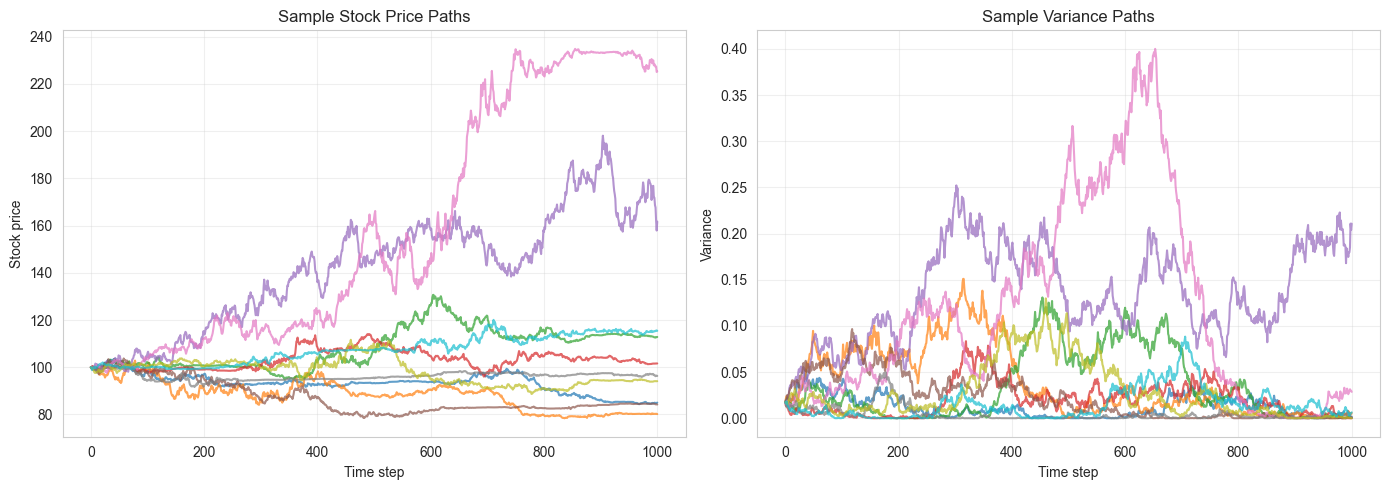

In [45]:
# Plot sample paths
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stock price paths
axes[0].plot(S[:10].T, alpha=0.7)
axes[0].set_xlabel('Time step')
axes[0].set_ylabel('Stock price')
axes[0].set_title('Sample Stock Price Paths')
axes[0].grid(True, alpha=0.3)

# Variance paths
axes[1].plot(v[:10].T, alpha=0.7)
axes[1].set_xlabel('Time step')
axes[1].set_ylabel('Variance')
axes[1].set_title('Sample Variance Paths')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

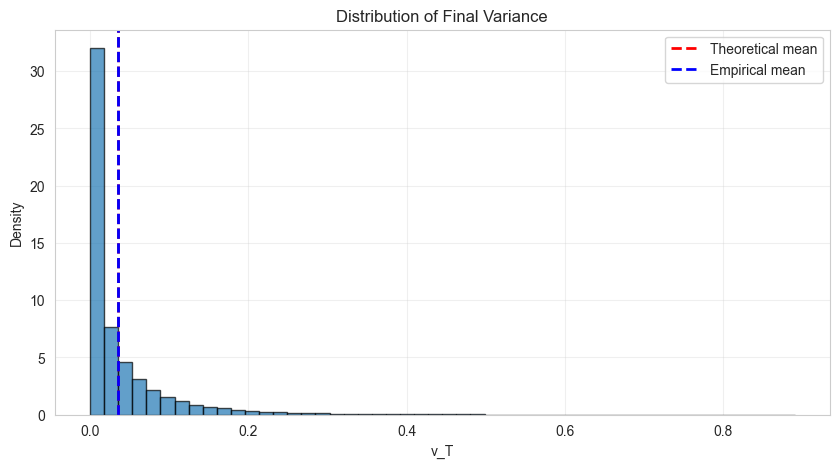

In [46]:
# Distribution of v_T
v_T = v[:, -1]

plt.figure(figsize=(10, 5))
plt.hist(v_T, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(validation['E_v_T_theoretical'], color='red', linestyle='--', linewidth=2, label='Theoretical mean')
plt.axvline(validation['E_v_T_empirical'], color='blue', linestyle='--', linewidth=2, label='Empirical mean')
plt.xlabel('v_T')
plt.ylabel('Density')
plt.title('Distribution of Final Variance')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## 5. Payoff Distribution

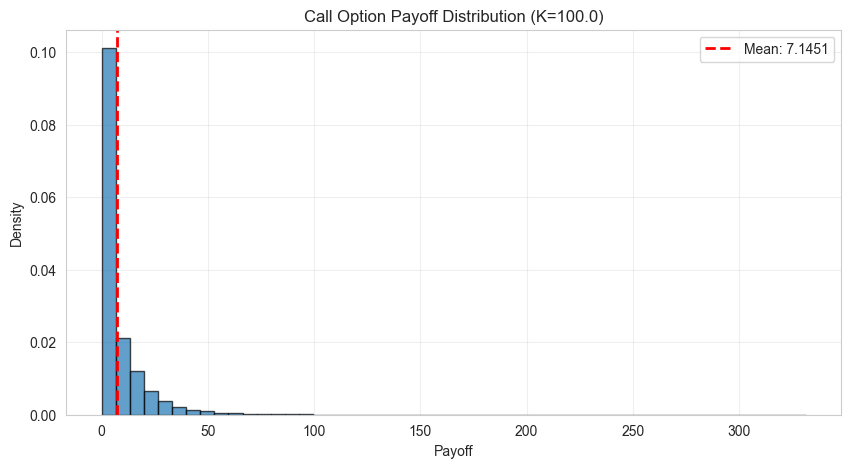

Payoff statistics:
  Mean: 7.1451
  Std:  12.5895
  Min:  0.0000
  Max:  331.5277
  Fraction ITM: 53.57%


In [47]:
K = heston_params['K']
Z = np.maximum(S[:, -1] - K, 0)

plt.figure(figsize=(10, 5))
plt.hist(Z, bins=50, density=True, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(Z), color='red', linestyle='--', linewidth=2, label=f'Mean: {np.mean(Z):.4f}')
plt.xlabel('Payoff')
plt.ylabel('Density')
plt.title(f'Call Option Payoff Distribution (K={K})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

print(f"Payoff statistics:")
print(f"  Mean: {np.mean(Z):.4f}")
print(f"  Std:  {np.std(Z):.4f}")
print(f"  Min:  {np.min(Z):.4f}")
print(f"  Max:  {np.max(Z):.4f}")
print(f"  Fraction ITM: {(Z > 0).mean():.2%}")

## Conclusion

Validation checks passed. Heston simulation with Inverse Gaussian scheme is working correctly.